<a href="https://colab.research.google.com/github/seyed-mohammadreza-mousavi/wwa/blob/main/4_imbalanced_data_normal_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import seaborn as sns
import random

# Generate a binary dataset
#X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
#X, y = make_blobs(n_samples=10000, n_features=2, centers=[(-2, -2), (2, 2)], cluster_std=0.5, random_state=42)
#X, y = make_blobs(n_samples=10000, n_features=2, centers=[(-2, -2), (2, 2)], cluster_std=[1.5, 1.5], random_state=42)

# Set the parameters for the imbalanced dataset
n_samples = 10000
n_features = 2
weights = [0.95, 0.05]  # Adjust the class weights here
class_sep = 2.0

# Set the mean and covariance for the minority class
mu_minority = np.array([1, 1])  # Mean of the minority class
cov_minority = np.array([[1, 0], [0, 1]])  # Covariance matrix of the minority class

# Set the mean and covariance for the majority class
mu_majority = np.array([-1, -1])  # Mean of the majority class
cov_majority = np.array([[1, 0], [0, 1]])  # Covariance matrix of the majority class

# Generate samples for the minority class
minority_samples = int(n_samples * weights[1])
X_minority = np.random.multivariate_normal(mu_minority, cov_minority, minority_samples)
y_minority = np.ones(minority_samples, dtype=int)

# Generate samples for the majority class
majority_samples = n_samples - minority_samples
X_majority = np.random.multivariate_normal(mu_majority, cov_majority, majority_samples)
y_majority = np.zeros(majority_samples, dtype=int)

# Concatenate the minority and majority class samples
X = np.concatenate((X_majority, X_minority))
y = np.concatenate((y_majority, y_minority))

X.shape, y.shape, len(X_minority), len(X_majority)

((10000, 2), (10000,), 500, 9500)

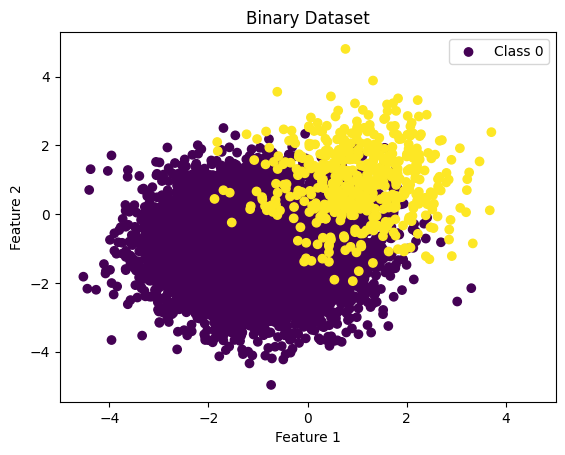

In [51]:
# Separate features
feature_1 = X[:, 0]
feature_2 = X[:, 1]
feature_1.shape, feature_2.shape

# Visualize the dataset
plt.scatter(feature_1, feature_2, c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Dataset')

# Add legend labels
plt.legend(['Class 0', 'Class 1'])
plt.xlim([-5, 5])

plt.show()

In [52]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the number of epochs
max_epochs = 2000
stopper=500

# Initialize the classifier
#classifier = SVC()
classifier = SGDClassifier(loss='hinge')

# Initialize variables to track the best F-measure and corresponding epoch
best_f_measure = 0
best_epoch = 0

for epoch in range(1, max_epochs + 1):
    # Shuffle the training data
    #random.shuffle(X_train)
    #random.shuffle(y_train)

    # Train the classifier
    #classifier.fit(X_train, y_train)
    classifier.partial_fit(X_train, y_train, classes=np.unique(y_train))

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Calculate F-measure
    f_measure = f1_score(y_test, y_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print the results for the current epoch
    print(f"Epoch {epoch}:")
    print("F-measure:", f_measure)
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:", accuracy)
    print()

    # Check if the current F-measure is the best so far
    if f_measure > best_f_measure:
        best_f_measure = f_measure
        best_epoch = epoch

    # Check if the F-measure has not improved for a certain number of epochs
    if epoch - best_epoch >= stopper:
        print(f"F-measure has not improved for {stopper} epochs. Stopping training.")
        break

# Train a classifier (Support Vector Machine in this example)
#classifier = SVC()
#classifier.fit(X_train, y_train)

# Make predictions on the test set
#y_pred = classifier.predict(X_test)

Epoch 1:
F-measure: 0.20833333333333334
Confusion Matrix:
[[1914    0]
 [  76   10]]
Accuracy: 0.962

Epoch 2:
F-measure: 0.6590909090909091
Confusion Matrix:
[[1882   32]
 [  28   58]]
Accuracy: 0.97

Epoch 3:
F-measure: 0.7195121951219512
Confusion Matrix:
[[1895   19]
 [  27   59]]
Accuracy: 0.977

Epoch 4:
F-measure: 0.6808510638297872
Confusion Matrix:
[[1907    7]
 [  38   48]]
Accuracy: 0.9775

Epoch 5:
F-measure: 0.7027027027027026
Confusion Matrix:
[[1904   10]
 [  34   52]]
Accuracy: 0.978

Epoch 6:
F-measure: 0.6931818181818181
Confusion Matrix:
[[1885   29]
 [  25   61]]
Accuracy: 0.973

Epoch 7:
F-measure: 0.5777777777777778
Confusion Matrix:
[[1904   10]
 [  47   39]]
Accuracy: 0.9715

Epoch 8:
F-measure: 0.6805555555555557
Confusion Matrix:
[[1905    9]
 [  37   49]]
Accuracy: 0.977

Epoch 9:
F-measure: 0.6878980891719745
Confusion Matrix:
[[1897   17]
 [  32   54]]
Accuracy: 0.9755

Epoch 10:
F-measure: 0.7272727272727273
Confusion Matrix:
[[1895   19]
 [  26   60]]
Acc

F1 Score: 0.6887417218543046
Confusion Matrix:
[[1901   13]
 [  34   52]]
True Positive (TP): 52
True Negative (TN): 1901
False Positive (FP): 13
False Negative (FN): 34


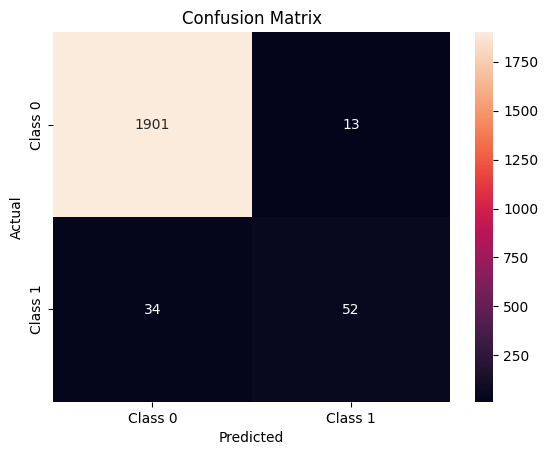

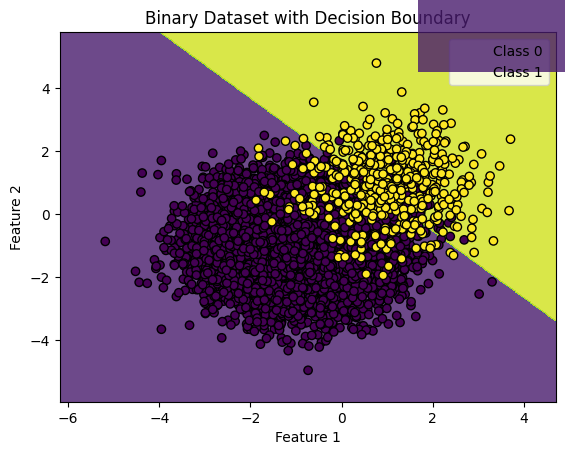

In [53]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("F1 Score:", f1)
print("Confusion Matrix:")
print(cm)
print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)
# Visualize the confusion matrix
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(feature_1, feature_2, c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Dataset with Decision Boundary')
plt.legend(['Class 0', 'Class 1'])
plt.show()